In [1]:
import networkx as nx
import random
import matplotlib.pyplot as plt
from tqdm import tqdm

# SIS Model on a Network

Let $( G = (V, E) )$ be an undirected graph with $( N )$ nodes (individuals) and edges $( E )$ representing connections between individuals. Each node $( i \in V )$ can be in one of two states:
- **Susceptible (S)**: The individual is healthy but can become infected.
- **Infected (I)**: The individual is infected and can spread the disease.

## State Transitions
1. **Infection**: A susceptible node $( i )$ becomes infected at a rate $ \beta$  if it is connected to an infected neighbor.
2. **Recovery**: An infected node $( i )$ recovers and becomes susceptible again at a rate $( \gamma )$.

## Mathematical Formulation
Let $ X_i(t) $ represent the state of node $i$ at time $t$:
$$
X_i(t) =
\begin{cases}
0 & \text{if node } i \text{ is susceptible at time } t, \\
1 & \text{if node } i \text{ is infected at time } t.
\end{cases}
$$
The dynamics of the SIS model are governed by the following rules:

### Infection Process
A susceptible node $i$ becomes infected with probability:
$$
P(X_i(t+1) = 1 \mid X_i(t) = 0) = 1 - (1 - \beta)^{m_i(t)},
$$
where $m_i(t)$ is the number of infected neighbors of node $i$ at time $t$:
$$
m_i(t) = \sum_{j \in \mathcal{N}(i)} X_j(t),
$$
and $\mathcal{N}(i)$ is the set of neighbors of node $i$.

### Recovery Process
An infected node $i$ recovers and becomes susceptible with probability:
$$
P(X_i(t+1) = 0 \mid X_i(t) = 1) = \gamma.
$$

## System Dynamics
The fraction of infected nodes at time $t$, denoted $ \rho(t) $, is:
$$
\rho(t) = \frac{1}{N} \sum_{i=1}^N X_i(t).
$$

The system evolves over time according to the infection and recovery processes described above.

In [19]:
import networkx as nx
import numpy as np
from scipy.sparse import csr_matrix

# Parameters
N = 1000  # Number of nodes
p = 0.001  # Edge probability
beta = 0.3  # Infection rate
gamma = 0.1  # Recovery rate
initial_infected_fraction = 0.05  # Initial fraction of infected nodes
simulation_steps = 100  # Number of simulation steps



In [20]:
%%time
# Generate Erdős-Rényi graph
G = nx.erdos_renyi_graph(N, p)

# Convert graph to sparse adjacency matrix
adj_matrix = nx.adjacency_matrix(G)

# Initialize node states
states = np.zeros(N, dtype=int)
initial_infected = np.random.choice(N, size=int(initial_infected_fraction * N), replace=False)
states[initial_infected] = 1

CPU times: total: 125 ms
Wall time: 135 ms


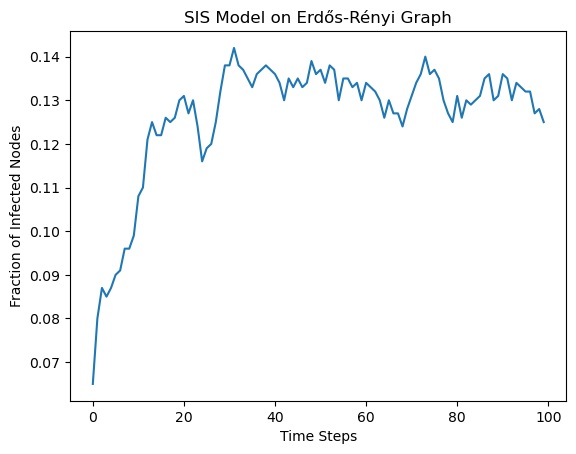

CPU times: total: 219 ms
Wall time: 213 ms


In [21]:
%%time
# Simulation
infected_fraction_over_time = []

for step in range(simulation_steps):
    # Recovery process
    recovery_mask = (states == 1) & (np.random.rand(N) < gamma)
    states[recovery_mask] = 0

    # Infection process
    infection_prob = 1 - (1 - beta) ** adj_matrix.dot(states)
    infection_mask = (states == 0) & (np.random.rand(N) < infection_prob)
    states[infection_mask] = 1

    # Track fraction of infected nodes
    infected_fraction = np.mean(states)
    infected_fraction_over_time.append(infected_fraction)

# Plot results
import matplotlib.pyplot as plt
plt.plot(infected_fraction_over_time)
plt.xlabel('Time Steps')
plt.ylabel('Fraction of Infected Nodes')
plt.title('SIS Model on Erdős-Rényi Graph')
plt.show()

In [22]:
%%time
# Parameters
N = 1000  # Number of nodes
p = 0.01  # Probability of edge creation in Erdős-Rényi graph
beta = 0.3  # Infection rate
gamma = 0.1  # Recovery rate
initial_infected_fraction = 0.05  # Initial fraction of infected nodes
simulation_steps = 365  # Number of simulation steps

# Create Erdős-Rényi graph
G = nx.erdos_renyi_graph(N, p)

# Initialize node states: 0 for Susceptible, 1 for Infected
states = {node: 0 for node in G.nodes()}
initial_infected = random.sample(list(G.nodes()), int(initial_infected_fraction * N))
for node in initial_infected:
    states[node] = 1

# Simulation
infected_fraction_over_time = []

for step in tqdm(range(simulation_steps)):
    new_states = states.copy()
    
    for node in G.nodes():
        if states[node] == 1:  # If node is infected
            # Recovery process
            if random.random() < gamma:
                new_states[node] = 0
        else:  # If node is susceptible
            # Infection process
            neighbors = list(G.neighbors(node))
            infected_neighbors = [nbr for nbr in neighbors if states[nbr] == 1]
            if random.random() < 1 - (1 - beta) ** len(infected_neighbors):
                new_states[node] = 1
    
    states = new_states
    infected_fraction = sum(states.values()) / N
    infected_fraction_over_time.append(infected_fraction)

100%|██████████████████████████████████████████████████████████████████████████████| 365/365 [00:00<00:00, 2040.48it/s]

CPU times: total: 312 ms
Wall time: 296 ms


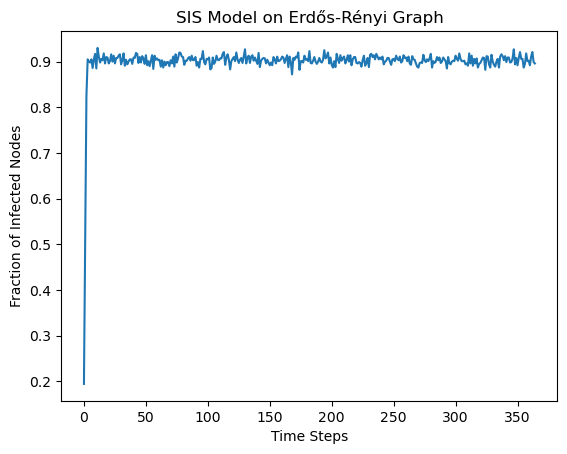

In [23]:
# Plot the results
plt.plot(infected_fraction_over_time)
plt.xlabel('Time Steps')
plt.ylabel('Fraction of Infected Nodes')
plt.title('SIS Model on Erdős-Rényi Graph')
plt.show()